In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#  Tiến hành đọc dữ liệu, ma trận tín hiệu lưu vào biến X, ma trận nồng độ lưu vào biến y
X = pd.read_excel("signal.xlsx")
y = pd.read_excel("conc.xlsx")

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# In ra hình dạng của các ma trận
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24, 151) (6, 151) (24, 2) (6, 2)


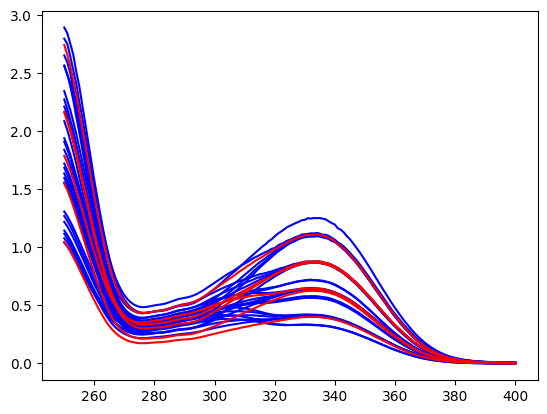

In [136]:
# Vẽ phổ của các mẫu trong tập train
plt.plot(X_train.T, c='b')
# Vẽ phổ của các mẫu trong tập test
plt.plot(X_test.T, c='r')
plt.show()

In [137]:
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

(24, 2) (6, 2)


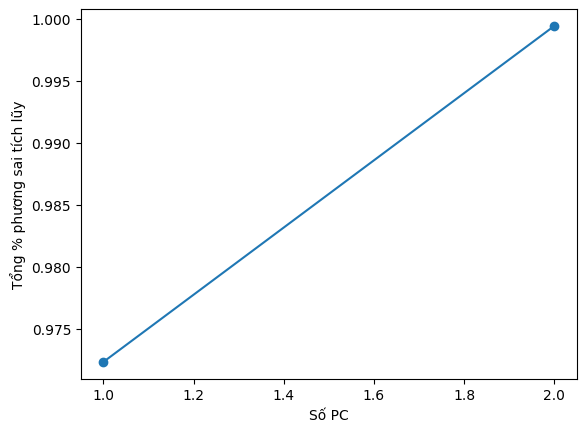

In [138]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Số PC')
plt.ylabel('Tổng % phương sai tích lũy')
plt.show()

In [139]:
# Tạo mô hình hồi quy đa biến tuyến tính
model = LinearRegression()
# Cho mô hình học dữ liệu train đã pca
model.fit(X_train_pca, y_train)
# Dử dụng mô hình để dự đoán nống độ của ma trận tín hiệu test đã pca
y_pred = model.predict(X_test_pca)
print(pd.DataFrame(np.concatenate((y_pred, y_test), axis=1)
                   ,columns=["Predict Bentazone", "Predict Pymetrozine", "True Bentazone", "True Pymetrozine"]))

   Predict Bentazone  Predict Pymetrozine  True Bentazone  True Pymetrozine
0           0.398245             3.507750            0.40               3.5
1           0.256186             1.513966            0.25               1.5
2           0.552060             2.051589            0.55               2.0
3           0.680803             3.433756            0.70               3.5
4           0.540611             2.562348            0.55               2.5
5           0.395978             1.472719            0.40               1.5


In [140]:
print("Bảng phần trăm sai số")
print(np.abs(y_pred-y_test) / y_test * 100)

Bảng phần trăm sai số
    Bentazone  Pymetrozine
17   0.438865     0.221429
21   2.474326     0.931089
10   0.374542     2.579426
19   2.742470     1.892674
14   1.707105     2.493933
20   1.005495     1.818715
